## Naive Bayes model

Test accuracy: 0.23676761958675346


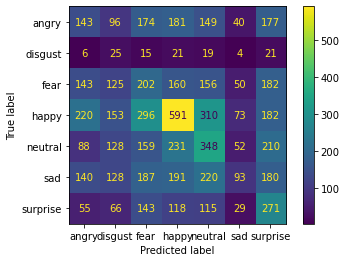

Classification report: 
               precision    recall  f1-score   support

       angry       0.18      0.15      0.16       960
     disgust       0.03      0.23      0.06       111
        fear       0.17      0.20      0.18      1018
       happy       0.40      0.32      0.36      1825
     neutral       0.26      0.29      0.27      1216
         sad       0.27      0.08      0.13      1139
    surprise       0.22      0.34      0.27       797

    accuracy                           0.24      7066
   macro avg       0.22      0.23      0.20      7066
weighted avg       0.27      0.24      0.24      7066



In [6]:
# Import required libraries
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define paths for training and validation data
train_path = '../datasets/train'
val_path = '../datasets/validation'

# Define emotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load training data
train_data = []
train_labels = []
for i, emotion in enumerate(emotions):
    for img_name in os.listdir(os.path.join(train_path, emotion)):
        img_path = os.path.join(train_path, emotion, img_name)
        img = plt.imread(img_path)
        train_data.append(img.flatten())
        train_labels.append(i)

# Load validation data
val_data = []
val_labels = []
for i, emotion in enumerate(emotions):
    for img_name in os.listdir(os.path.join(val_path, emotion)):
        img_path = os.path.join(val_path, emotion, img_name)
        img = plt.imread(img_path)
        val_data.append(img.flatten())
        val_labels.append(i)

# Convert data and labels to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# Define parameter grid for grid search
param_grid = {'alpha': [0.1, 1, 10]}

# Create Naive Bayes classifier object
nb = MultinomialNB()

# Perform grid search to find best parameters
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)
grid_search.fit(train_data, train_labels)
best_alpha = grid_search.best_params_['alpha']

# Train Naive Bayes classifier with best parameters
nb = MultinomialNB(alpha=best_alpha)
nb.fit(train_data, train_labels)

# Evaluate on validation set
val_preds = nb.predict(val_data)
val_acc = accuracy_score(val_labels, val_preds)
print('Test accuracy:', val_acc)

# Plot confusion matrix
plot_confusion_matrix(nb, val_data, val_labels, display_labels=emotions)
plt.show()

# Print classification report
print("Classification report: \n", classification_report(val_labels, val_preds, target_names=emotions))